# Seaborn

Seborn
1. maplotlib 기반의 시각화 라이브러리
2. 그래픽을 그리기 위한 고급 인터페이스 제공


In [1]:
import seaborn as sns
print(sns.__version__)

0.12.2


In [3]:
import pandas as pd
tips = pd.read_csv('tips.csv')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# 막대 그래프

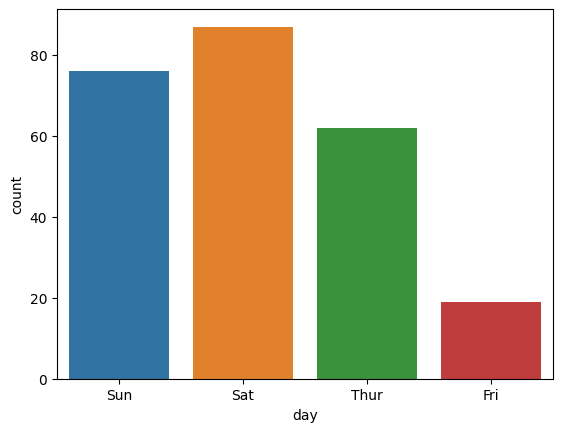

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=tips, x='day')
plt.show()

In [5]:
x = tips['day'].value_counts()
print(x)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


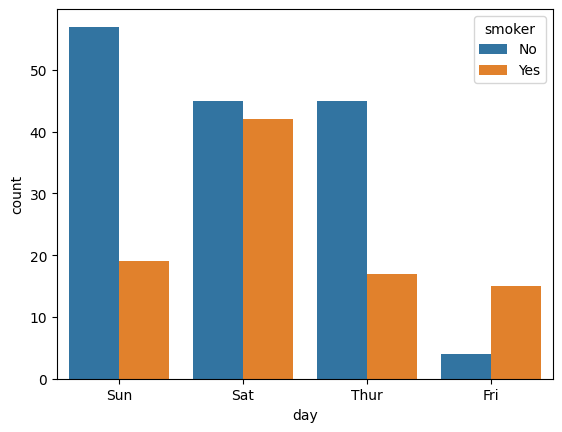

In [6]:
sns.countplot(data=tips, x='day', hue='smoker')
plt.show()


In [7]:
import pandas as pd
tips = pd.read_csv('tips.csv')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


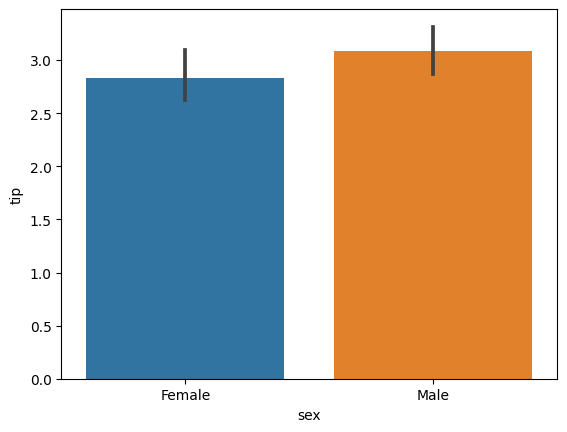

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = tips['sex'], y = tips['tip'])
plt.show()


In [9]:
x= tips.groupby(by='sex')['tip'].mean()
print(x)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


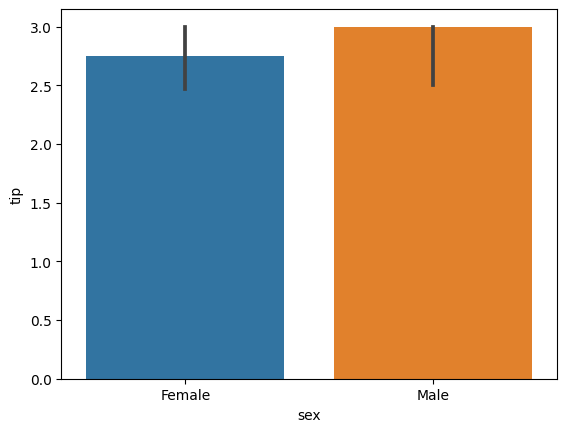

In [11]:
import numpy as np

sns.barplot(x = tips['sex'], y = tips['tip'], estimator=np.median)
plt.show()


# 히스토그램

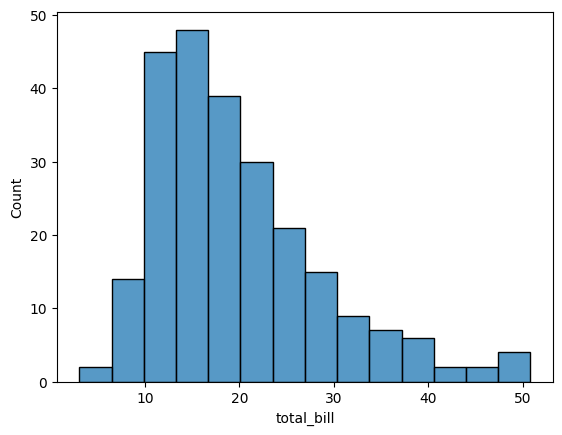

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x='total_bill', data=tips)
plt.show()

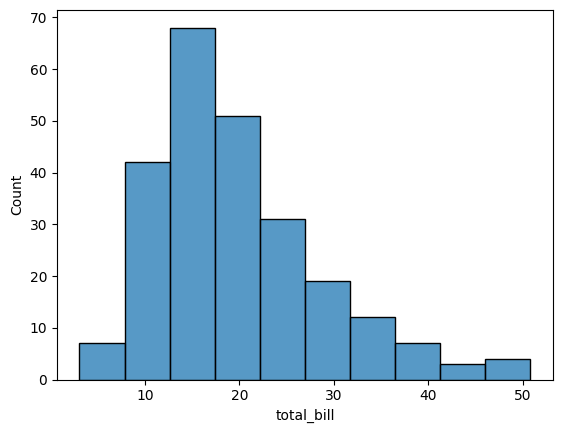

In [13]:
sns.histplot(data=tips, x='total_bill', bins=10)
plt.show()

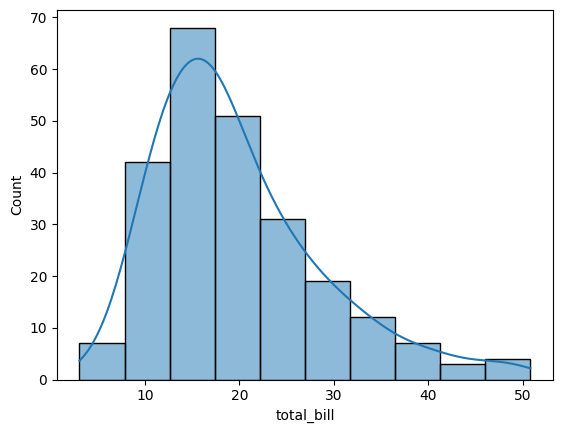

In [14]:
sns.histplot(data=tips, x='total_bill', bins=10, kde=True)
plt.show()

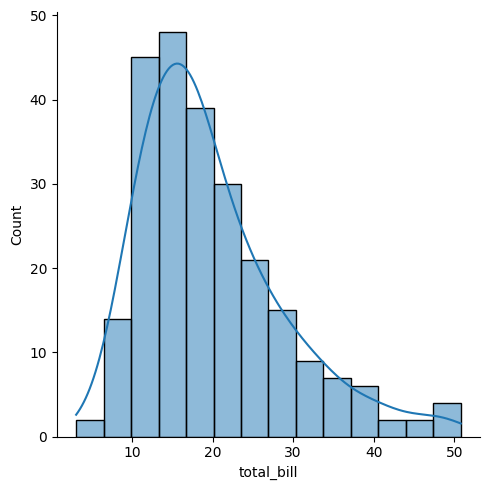

In [15]:
sns.displot(data=tips, x='total_bill', kde=True)
plt.show()

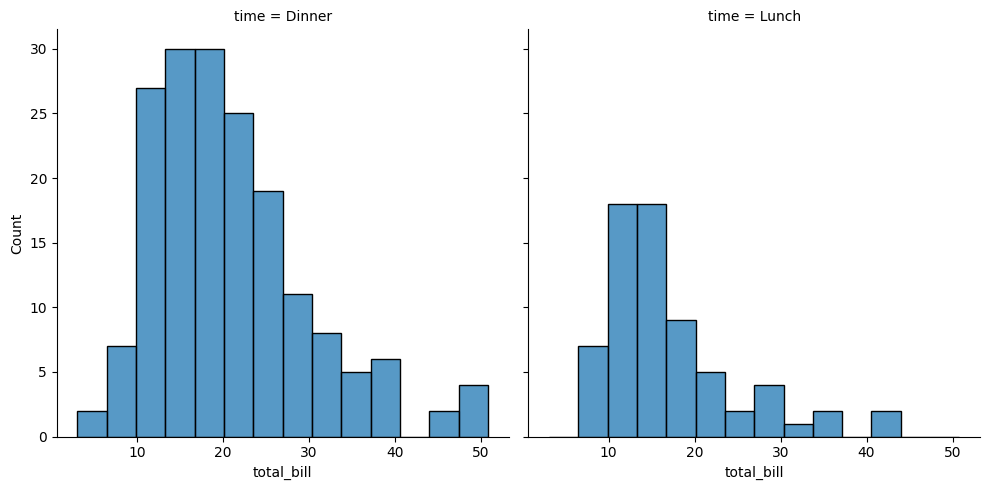

In [16]:
sns.displot(data=tips, x='total_bill', col='time')
plt.show()


# 박스플롯

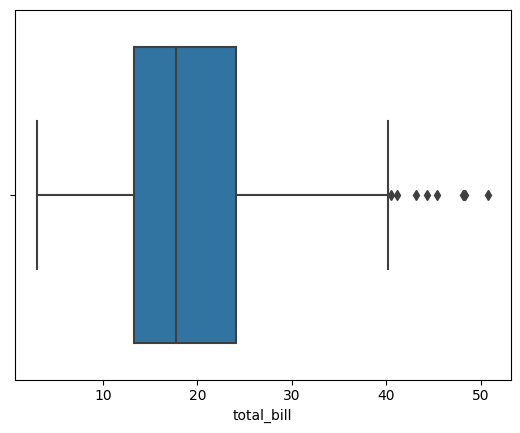

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = tips['total_bill'])
plt.show()

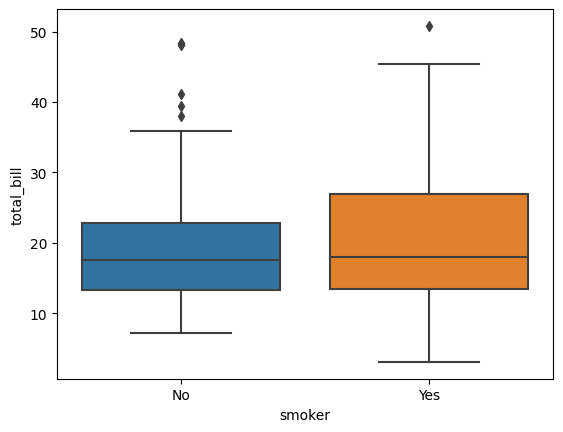

In [19]:
sns.boxplot(x='smoker', y='total_bill', data=tips)
plt.show()


# 바이올린 플롯

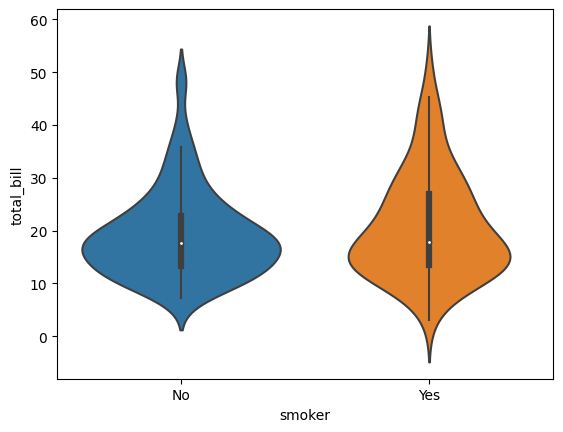

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x='smoker', y='total_bill', data=tips)
plt.show()

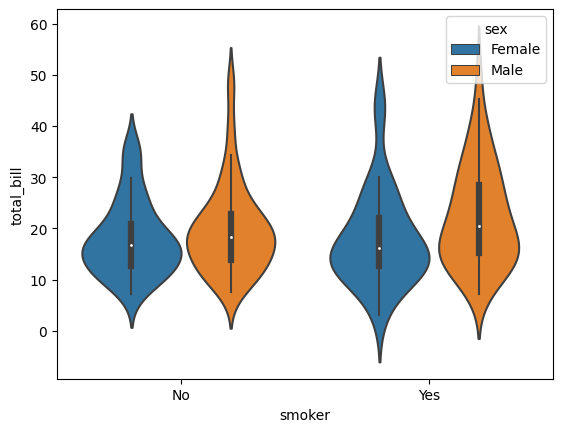

In [21]:
sns.violinplot(x='smoker', y='total_bill', hue='sex', data=tips)
plt.show()

# 히트맵

In [23]:
df = tips.select_dtypes(['number'])
df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [24]:
x = df.corr()
x

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


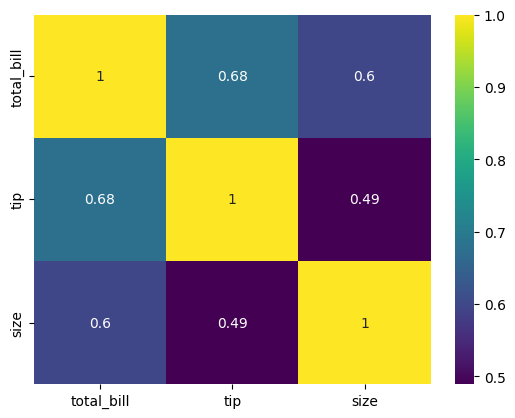

In [25]:
sns.heatmap(x, annot = True, cmap = 'viridis')
plt.show()


# 히트맵 - 타이타닉

<Axes: >

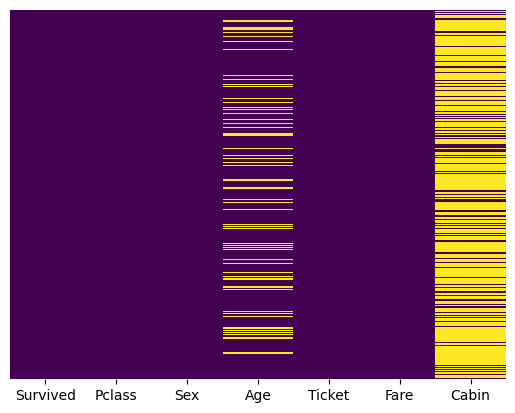

In [27]:
titanic = pd.read_csv("titanic.csv")
df = titanic[['Survived', 'Pclass', 'Sex', 'Age','Ticket', 'Fare', 'Cabin']]
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# 패싯그리드

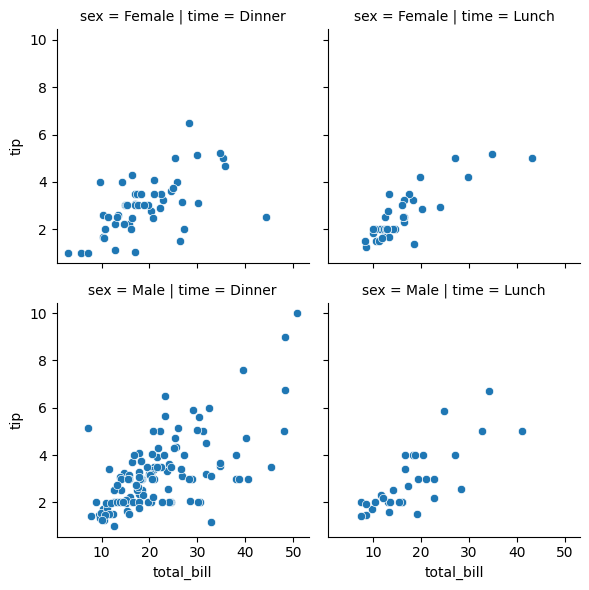

In [28]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()


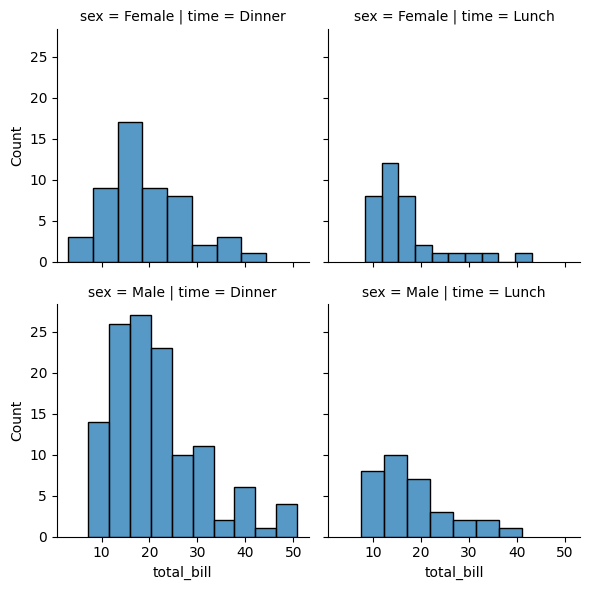

In [29]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map_dataframe(sns.histplot, x="total_bill")
plt.show()


# 페어플롯

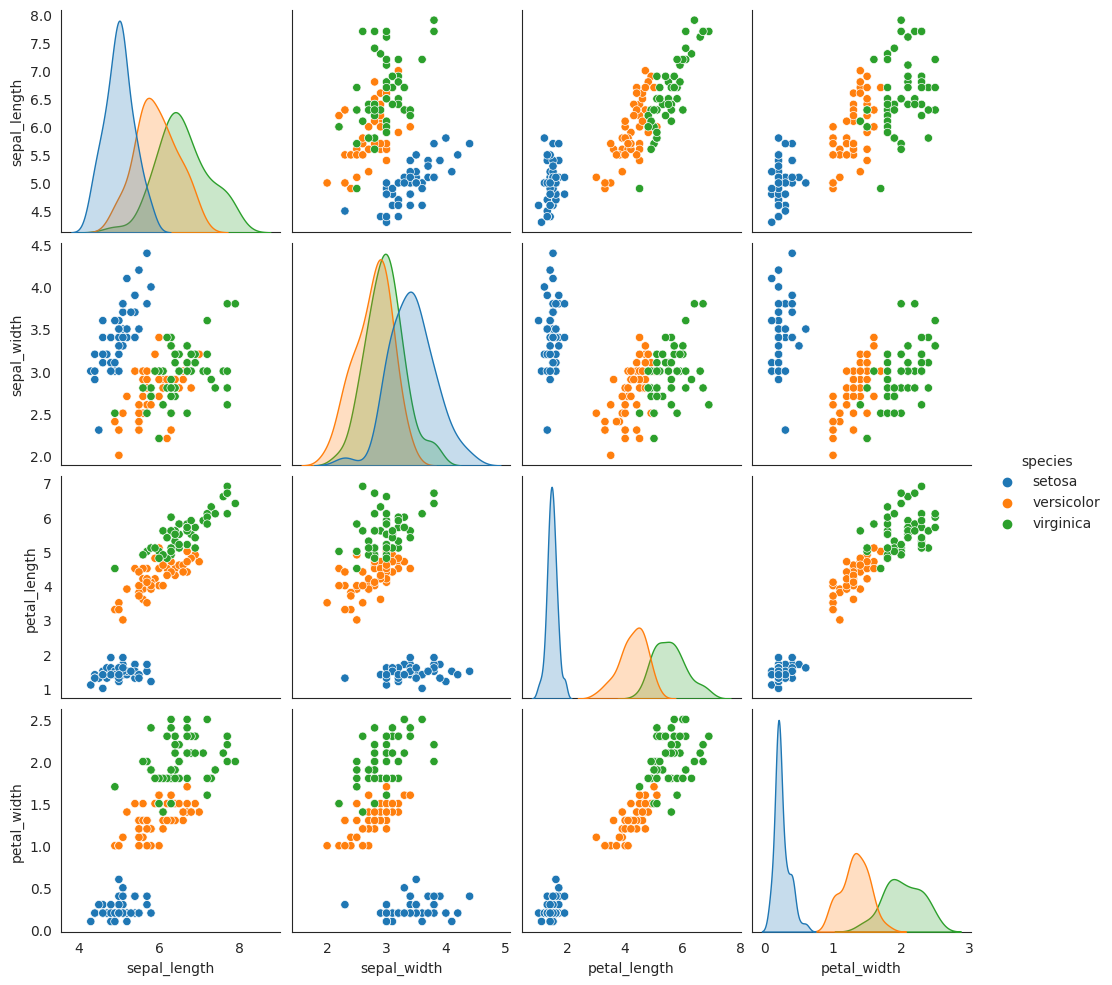

In [31]:
iris = sns.load_dataset('iris')
iris.head()
sns.set_style('white')
sns.pairplot(iris, hue='species')
plt.show()


In [33]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
titanic = sns.load_dataset('titanic')
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)

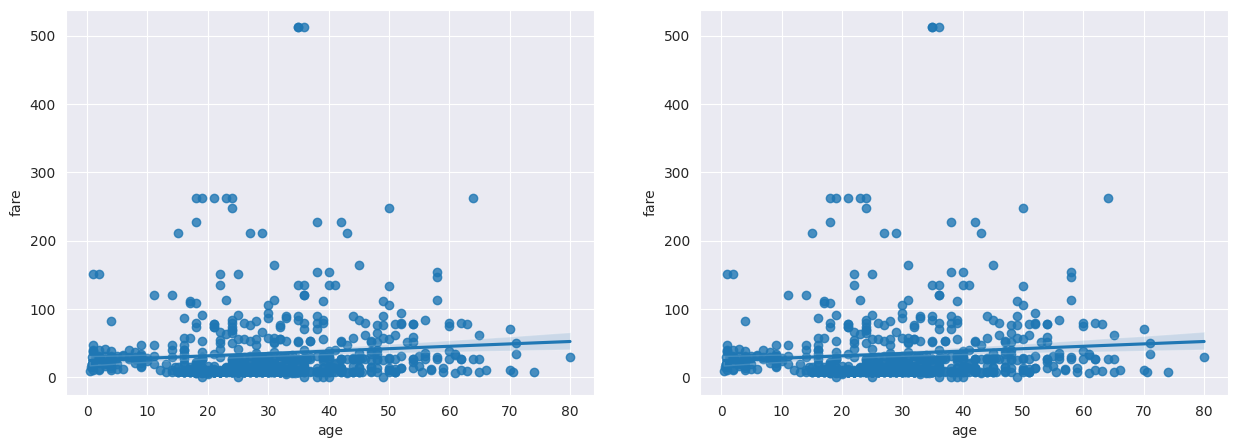

In [40]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='age', y='fare',data=titanic, ax=ax1)
sns.regplot(x='age', y='fare',data=titanic, ax=ax2)
plt.show()

In [47]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)



<ipython-input-48-3571981b2786>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax1)


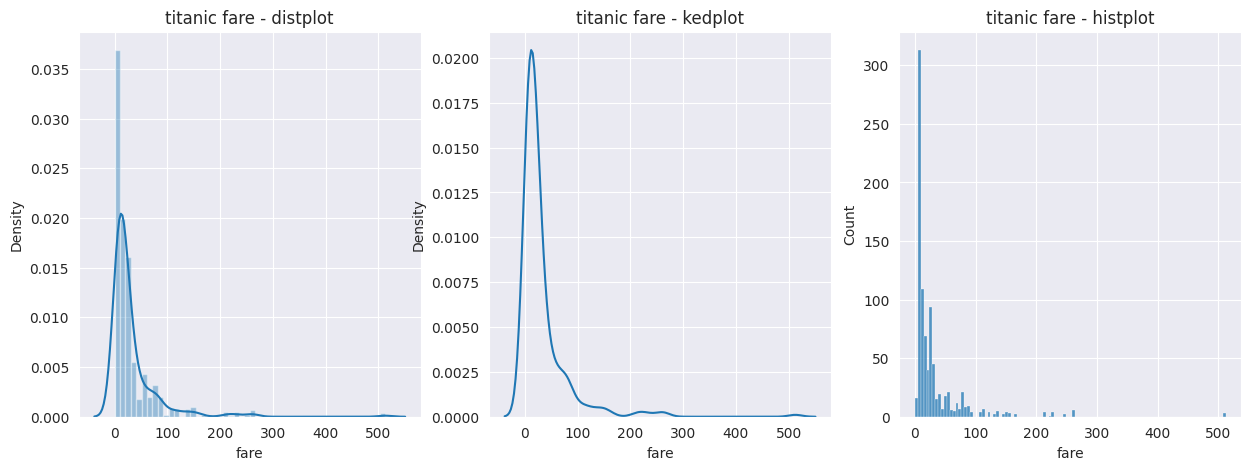

In [48]:
sns.set_style('darkgrid')
# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
# distplot
sns.distplot(titanic['fare'], ax=ax1)
# kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2)
# histplot
sns.histplot(x='fare', data=titanic, ax=ax3)
# 차트 제목 표시
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kedplot')
ax3.set_title('titanic fare - histplot')
plt.show()